<center>Заметка 2. 	Bootstrap. Проверка гипотез.</center>
<center>курс <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1. 19 февраля 2021 г.</center>

<b>Шаг 1: Создание повторных выборок ("псевдовыборок")</b>  

Создаем сотни новых выборок путем сэмплирования объектов с возвращением из исходной случайной выборки. Размер каждой повторной выборки совпадает с исходной случайной выборкой. В результате, каждый объект может встречаться один раз, более одного раза или вообще отсутствовать. 

<b>Шаг 2: Расчёт бутстреп распределения</b>   

Вычисляется статистика для каждой повторной выборки. Множество полученных статистик образует некоторое выборочное распределение и называется бутстреп-распределением.  

<b>Шаг 3: Применение бутстреп-распределение</b>  

Бутстреп-распределение дает информацию о форме, центре и разбросе выборочного распределения исследуемой статистики. С его помощью можно вычислять доверительные интервалы на данную статистику с произвольным уровнем значимости.

<b>Основная идея</b>

- Повторные выборки из основной представляют то, что мы получили бы, если бы взяли большое количество выборок из популяции.

- Распределение статистики бутстрепа, основанное на множестве повторных выборок представляет собой выборочное распределение статистики, основанное на множестве истинных выборок.

## Bootstrap standart error

Если интересующая нас статистика является средним значением выборки $\bar{x}$, то стандартная ошибка бутстрепа, основанная на повторных выборках:

$$SE_{boot,\bar{x}}= \sqrt{\frac{1}{B-1}\sum\bigg(\bar{x}^* - \frac{1}{B}\sum\bar{x}^*\bigg)^2}$$
 
В этом выражении $\bar{x}^*$ представляет собой среднее значение отдельной повторной выборки. Стандартная ошибка бутстрепа -- это обычное стандартное отклонение значений $B$ в $\bar{x}^*$. Звездочка в $\bar{x}^*$ отличает среднее значение повторной выборки от среднего значения $\bar{x}$ исходной выборки.

## Распределение выборки и бутстреп распределение

<b>1. Параметрический метод</b>

Если мы знаем, что объекты из генеральной совокупности распределены нормально, то теория говорит нам, что выборочное распределение их среднего значения $\bar{x}$ также является нормальным.

![Теория](https://user-images.githubusercontent.com/60938140/74949302-a0aa1d80-540e-11ea-8f0c-73b6050fc7fd.png)

<b>2. Наивный метод</b>

Берём очень много истинных выборок, считаем среднее значение $\bar{x}$ для каждой истинной выборки и смотрим на распределение этих значений.

![Наивныйметод](https://user-images.githubusercontent.com/60938140/74949346-b28bc080-540e-11ea-86fb-e85f9a878c5a.png)

<b>3. Бутстреп</b>

Когда теория не работает, и мы можем позволить себе только одну истинную выборку, то эта истинная выборка заменяет генеральную совокупность. Тогда распределение $\bar{x}$ рассчитанное по множеству "псевдовыборок" заменяет распределение выборки.

![Бутстреп](https://user-images.githubusercontent.com/60938140/74949363-b91a3800-540e-11ea-8175-f1606d751cea.png)

# Расходы покупателей

Имеются размеры сумм в долларах, потраченных 50 покупателями в супермаркете. Мы готовы рассматривать это как SRS (Simple Random Sample) всех покупателей на этом рынке.     

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
spending = np.array([3.11, 8.88, 9.26, 10.81, 12.69, 13.78, 15.23, 15.62, 17.00, 17.39,
            18.36, 18.43, 19.27, 19.50, 19.54, 20.16, 20.59, 22.22, 23.04, 24.47,
            24.58, 25.13, 26.24, 26.26, 27.65, 28.06, 28.08, 28.38, 32.03, 34.98,
            36.37, 38.64, 39.16, 41.02, 42.97, 44.08, 44.67, 45.40, 46.69, 48.65,
            50.39, 52.75, 54.80, 59.07, 61.22, 70.32, 82.70, 85.76, 86.37, 93.34])

In [2]:
np.mean(spending)

34.7022

1) Составьте гистограмму данных. Распределение слегка искажено.

2) Центральная предельная теорема говорит, что средние значения выборок будут группироваться вблизи среднего значения совокупности более плотно по мере увеличения размера каждой выборки. Распределение выборки примерно нормальное для n = 50? Чтобы выяснить это, воспользуйтесь бутстрепом и посмотрите среднее для полученного распределения.

3) Сравните стандартные ошибки. 

У нас есть два способа оценить стандартное отклонение среднего значения выборки $\bar{x}$: использовать формулу $s\big/\sqrt{n}$ для стандартной ошибки или использовать bootstrap standart error. Найдите стандартное отклонение выборки $s$ и используйте его, чтобы найти стандартную ошибку $s\big/\sqrt{n}$ среднего значения выборки. Насколько ваш результат согласуется с bootstrap standart error?

## Доверительный интервал

Вспомним односторонний доверительный интервал для среднего значения нормально распределеной совокупности:

$$\bar{x} \pm t^* \frac{s}{\sqrt{n}}$$

Этот интервал основан на нормальном распределении выборки со средним значением выборки $x$ и формулой для стандартной ошибки выборки $x$. Когда бутстреп распределение приблизительно нормальное и имеет небольшое смещение, мы можем использовать ту же самую формулу со стандартной ошибкой бутстрепа, чтобы получить доверительный интервал для любого параметра. 

Предположим, что бутстреп распределение статистики из SRS размера $n$ приблизительно нормально и мало смещено. Тогда аппроксимация доверительного интервала на любую статистику вычисляется через бутстреп:

$$statistic \pm t^*SE_{boot,statistic}$$

где $t^*$ - критическое значение $t(n-1)$ распределения с площадью между $-t^*$ и $t^*$.

In [3]:
import scipy
from scipy.stats import t

4) Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках".  

5) Также найдите стандартный односторонний доверительный интервал.

---
## Доверительный интервал

### Percentile bootstrap

$(\theta^*_{(\alpha/2)}, \theta^*_{(1 - \alpha/2)})$, где $\theta^*_{(\alpha/2)}$ означает квантиль бутстреп-распределения статистики.

Способ построения доверительного интервала по квантилям бустреп-распределения статистики. Этот метод может быть применен к любой статистике. Он будет хорошо работать в тех случаях, когда распределение бутстрэпа симметрично и центрировано на наблюдаемой статистике.

6. Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках" по формуле выше. Оставьте 95% ваших наблюдений. Для этого от полученного бутстреп-распределения отсеките хвосты с помощью `np.quantile`

# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

rats = pd.read_table("rats.txt", sep="\t")
shuffle(rats)

,lifespan,diet
42,974,restricted
104,1393,restricted
65,1099,restricted
139,678,ad libitum
116,545,ad libitum
...,...,...
167,743,ad libitum
51,1017,restricted
91,1228,restricted
150,710,ad libitum


In [5]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

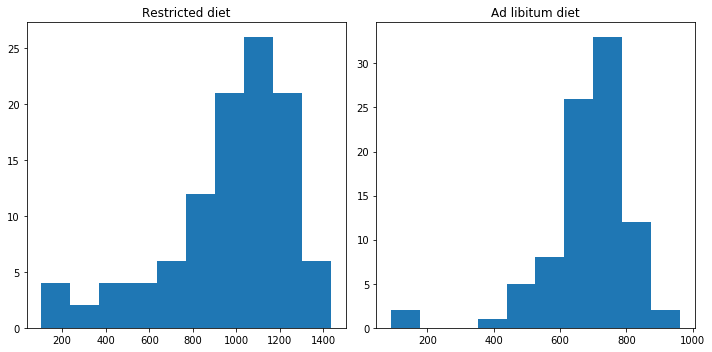

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout();

1. Нарисуйте один график с двумя boxplot на нем (для каждой из диет). Укажите на графике 95% доверительный интервал для каждой из медиан. В этом вам поможет функция boxplot(..., notch=TRUE), которой первым аргументом можно передать объект типа формула.

## Нормальность

2. Проверим нормальность двух выборок (для каждой из диет). Для этого нарисуйте qq-график и отметьте на нем прямую линию, соответствующую идеальным теоретическим квантилям нормального распределения. Похожи ли данные на нормальное распределение?

In [7]:
import statsmodels.api as sm

3. Попробуйте исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой) и снова нарисовать qq-графики. Можно ли применять к этим данным критерии, основанные на предположении о нормальности?